In [1]:
%matplotlib inline
import xarray


In [2]:
dataset = xarray.load_dataset("steinmetz_neuromatch_dataset/steinmetz_2016-12-14_Cori.nc")

In [3]:
dataset

<xarray.Dataset>
Dimensions:             (trial: 364, time: 250, cell: 734,
                         waveform_component: 3, sample: 82, probe: 384,
                         brain_area_lfp: 7, spike_id: 2446173)
Coordinates:
  * trial               (trial) int32 1 2 3 4 5 6 7 ... 359 360 361 362 363 364
  * time                (time) float64 0.01 0.02 0.03 0.04 ... 2.48 2.49 2.5
  * cell                (cell) int32 1 2 3 4 5 6 7 ... 729 730 731 732 733 734
  * waveform_component  (waveform_component) int32 1 2 3
  * probe               (probe) int32 1 2 3 4 5 6 7 ... 379 380 381 382 383 384
  * brain_area_lfp      (brain_area_lfp) object 'ACA' 'LS' ... 'SUB' 'VISp'
  * spike_id            (spike_id) int32 1 2 3 4 ... 2446171 2446172 2446173
Dimensions without coordinates: sample
Data variables: (12/31)
    contrast_left       (trial) int8 100 0 100 0 50 0 0 ... 0 100 50 50 0 25 100
    contrast_right      (trial) int8 0 50 50 0 100 0 0 ... 25 100 25 25 50 0 100
    gocue               (trial) float64 1.027 0.8744 0.8252 ... nan nan nan
    stim_onset          (trial) float64 0.5 0.5 0.5 0.5 0.5 ... 0.5 0.5 0.5 0.5
    feedback_type       (trial) float64 1.0 1.0 1.0 1.0 -1.0 ... nan nan nan nan
    feedback_time       (trial) float64 1.187 1.438 0.986 2.296 ... nan nan nan
    ...                  ...
    waveform_w          (cell, sample, waveform_component) float32 0.0 ... -0...
    waveform_u          (cell, waveform_component, probe) float32 0.0 ... 0.0
    lfp                 (brain_area_lfp, trial, time) float64 -2.851 ... 5.571
    spike_time          (spike_id) float32 0.2676 2.308 0.8535 ... 2.189 2.399
    spike_cell          (spike_id) uint32 1 1 1 1 1 1 ... 734 734 734 734 734
    spike_trial         (spike_id) uint32 21 21 31 37 43 ... 364 364 364 364 364
Attributes:
    session_date:  2016-12-14
    mouse:         Cori
    stim_onset:    0.5
    bin_size:      0.01

In [4]:
dataset.wheel

<xarray.DataArray 'wheel' (trial: 364, time: 250)>
array([[-1,  0,  0, ...,  1,  0,  1],
       [ 0, -1,  0, ...,  1,  0,  0],
       [ 0,  0, -1, ..., -1,  0,  0],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=int8)
Coordinates:
  * trial    (trial) int32 1 2 3 4 5 6 7 8 9 ... 357 358 359 360 361 362 363 364
  * time     (time) float64 0.01 0.02 0.03 0.04 0.05 ... 2.46 2.47 2.48 2.49 2.5

In [5]:
dataset.wheel.values

array([[-1,  0,  0, ...,  1,  0,  1],
       [ 0, -1,  0, ...,  1,  0,  0],
       [ 0,  0, -1, ..., -1,  0,  0],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=int8)

In [6]:
dataset.wheel.values

array([[-1,  0,  0, ...,  1,  0,  1],
       [ 0, -1,  0, ...,  1,  0,  0],
       [ 0,  0, -1, ..., -1,  0,  0],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=int8)

In [7]:
wheel_data = dataset.wheel.to_dataframe().reset_index()

In [8]:
import seaborn as sns

<Axes: xlabel='time', ylabel='wheel'>

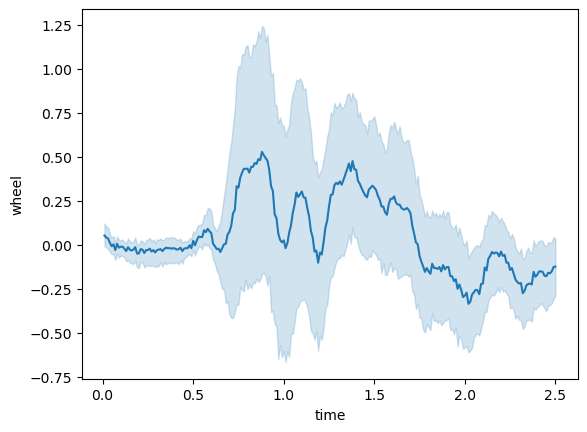

In [9]:
sns.lineplot(data=wheel_data, x="time", y="wheel")

In [10]:
dataset.lfp

<xarray.DataArray 'lfp' (brain_area_lfp: 7, trial: 364, time: 250)>
array([[[-2.85079365e+00, -4.03968254e+00, -4.19523810e+00, ...,
          7.26984127e-01, -2.21746032e+00,  1.09936508e+01],
        [ 9.14263039e+00,  1.14759637e+01,  1.47648526e+01, ...,
          3.03151927e+00,  9.20929705e+00,  7.97596372e+00],
        [ 2.65668934e+00,  4.54557823e+00,  7.65668934e+00, ...,
         -1.79877551e+01, -1.76544218e+01, -1.15433107e+01],
        ...,
        [-3.73741497e+00, -1.10408163e+00, -2.80408163e+00, ...,
          6.68480726e+00,  1.34514739e+01, -9.29705215e-02],
        [-6.76190476e-01, -3.77619048e+00, -8.06507937e+00, ...,
          2.03349206e+01,  1.96126984e+01,  7.19047619e+00],
        [ 3.18326531e+01,  2.46215420e+01,  1.04659864e+01, ...,
         -5.93401361e+00, -1.26451247e+01, -1.59229025e+01]],

       [[ 9.41496599e-01, -4.18367347e-02, -8.50850340e+00, ...,
          4.52482993e+00, -1.68367347e-02,  8.23316327e+00],
        [ 8.85068027e+00,  7.84234694e+00,  7.06734694e+00, ...,
          2.85068027e+00,  1.97568027e+00,  6.57568027e+00],
        [ 1.14316327e+01, -2.35034014e-01,  4.95663265e+00, ...,
         -1.97100340e+01, -1.91850340e+01, -9.22670068e+00],
...
        [ 2.80408163e+00,  1.77707483e+01,  2.32540816e+01, ...,
         -1.15125850e+01, -1.95918367e-01,  4.32074830e+00],
        [-1.01176871e+01, -3.34353741e-01,  7.71564626e+00, ...,
         -1.76870748e-02,  1.30823129e+01,  7.11564626e+00],
        [ 1.50935374e+01,  6.76020408e+00,  2.27687075e+00, ...,
          3.46020408e+00,  1.41102041e+01, -5.80646259e+00]],

       [[ 1.12764378e+00, -5.85417440e+00, -7.71781076e+00, ...,
          1.09458256e+01,  5.78218924e+00,  1.44640074e+01],
        [-3.92912801e+00, -6.65640074e+00,  1.47996289e+00, ...,
          1.15708720e+01,  1.94526902e+01,  1.67163265e+01],
        [ 7.94990724e+00, -6.82745826e-02, -1.21319109e+01, ...,
         -2.12500928e+01, -6.23191095e+00, -1.09554731e+00],
        ...,
        [ 1.08935065e+01,  1.26844156e+01,  2.68441558e+00, ...,
          3.86623377e+00, -5.24675325e-01, -4.33376623e+00],
        [-1.07480519e+01, -8.59350649e+00, -2.16623377e+00, ...,
          9.79220779e-01,  1.14064935e+01,  4.43376623e+00],
        [ 5.38868275e+00, -3.72040816e+00, -4.64768089e+00, ...,
          1.55523191e+01,  1.60432282e+01,  5.57050093e+00]]])
Coordinates:
  * trial           (trial) int32 1 2 3 4 5 6 7 ... 358 359 360 361 362 363 364
  * time            (time) float64 0.01 0.02 0.03 0.04 ... 2.47 2.48 2.49 2.5
  * brain_area_lfp  (brain_area_lfp) object 'ACA' 'LS' 'MOs' ... 'SUB' 'VISp'

In [11]:
df=dataset.lfp.to_dataframe().reset_index()

In [12]:
df

,brain_area_lfp,trial,time,lfp
0,ACA,1,0.01,-2.850794
1,ACA,1,0.02,-4.039683
2,ACA,1,0.03,-4.195238
3,ACA,1,0.04,-3.228571
4,ACA,1,0.05,0.460317
...,...,...,...,...
636995,VISp,364,2.46,6.761410
636996,VISp,364,2.47,11.952319
636997,VISp,364,2.48,15.552319
636998,VISp,364,2.49,16.043228


In [13]:
df_first_trial_ACA = df[(df['brain_area_lfp'] == 'ACA') & (df['trial'] == 1)]

In [14]:
df_first_trial_ACA

,brain_area_lfp,trial,time,lfp
0,ACA,1,0.01,-2.850794
1,ACA,1,0.02,-4.039683
2,ACA,1,0.03,-4.195238
3,ACA,1,0.04,-3.228571
4,ACA,1,0.05,0.460317
...,...,...,...,...
245,ACA,1,2.46,7.715873
246,ACA,1,2.47,1.593651
247,ACA,1,2.48,0.726984
248,ACA,1,2.49,-2.217460


In [15]:
%matplotlib inline

<Axes: xlabel='time', ylabel='lfp'>

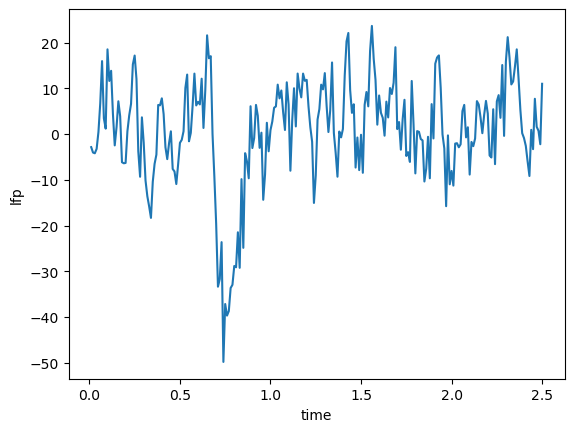

In [16]:
sns.lineplot(data=df_first_trial_ACA, x='time', y='lfp')

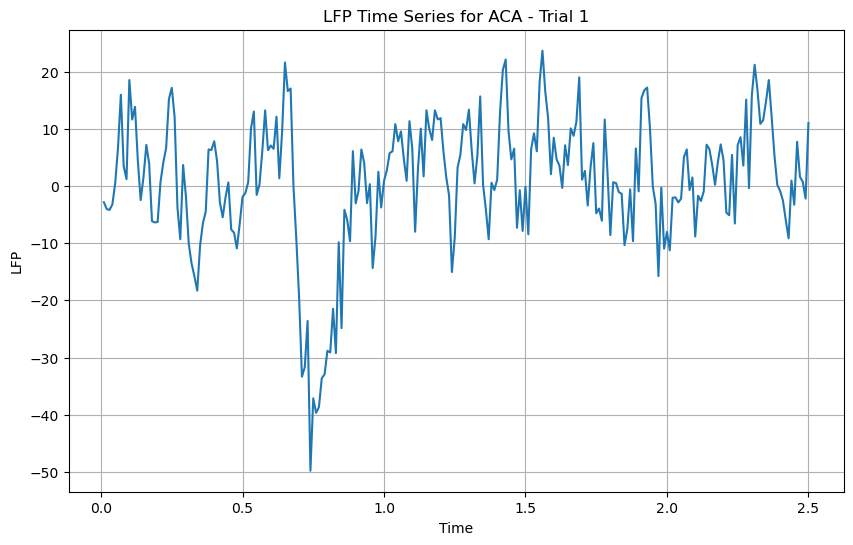

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(df_first_trial_ACA['time'], df_first_trial_ACA['lfp'])
plt.xlabel('Time')
plt.ylabel('LFP')
plt.title('LFP Time Series for ACA - Trial 1')
plt.grid(True)
plt.show()


In [18]:
sns.__version__

'0.12.2'

In [19]:
import matplotlib
matplotlib.__version__

'3.7.2'

Jupyter Notebook Renderes raises an error called 'error loading preloads'. No plots will be visible

Solution:
Go to extensions and disable or uninstall Jupyter Notebook Renderes
Reload vscode

In [20]:
min_potent=df_first_trial_ACA.lfp.min()
min_potent

-49.79523809523809

In [26]:
mintime = df_first_trial_ACA[df_first_trial_ACA["lfp"]==min_potent]["time"]

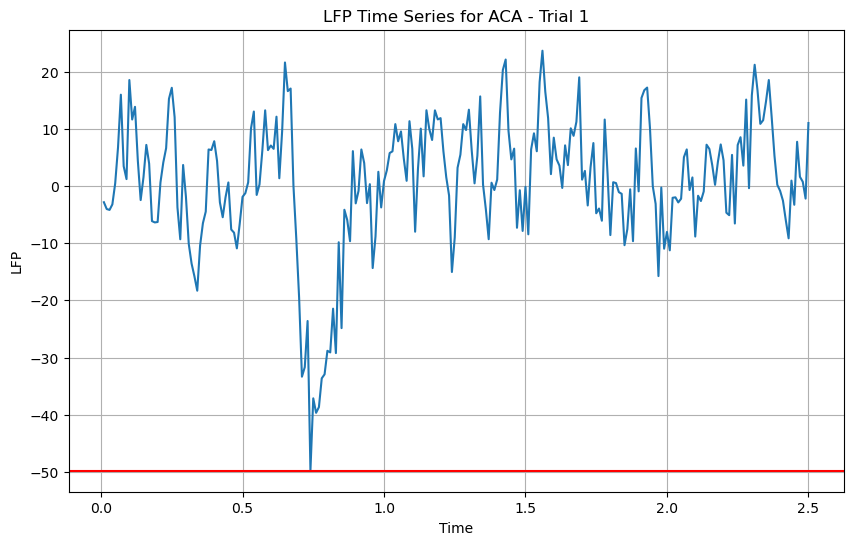

In [25]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(df_first_trial_ACA['time'], df_first_trial_ACA['lfp'])
plt.axhline(min_potent, color='r')
plt.axhline(mintime, color='r')
plt.xlabel('Time')
plt.ylabel('LFP')
plt.title('LFP Time Series for ACA - Trial 1')
plt.grid(True)
plt.show()
